# Clustering and Topic Modeling of Research Text at iSchool, Syracuse University



In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, NMF, LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('iSchoolpubdata_Experts_v5.csv')
df.head()

Name  \
0                           Bei Yu   
1                       Beth Patin   
2                     Bruce Kingma   
3                   Bryan C Semaan   
4  Carlos Enrique Caicedo Bastidas   

                                  TitlesAndAbstracts  
0  Topic modeling for evaluating students' reflec...  
1  Struggling to breathe -- Purpose: The purpose ...  
2  University-wide entrepreneurship education -- ...  
3  “I am uncomfortable sharing what I can't see” ...  
4  An initial approach towards quality of service...

In [3]:
df.shape

(30, 2)

In [4]:
np.set_printoptions(precision=2)

## Using Count Vectorizer or simply Term frequency

In [5]:
authors = df['Name'].tolist()

count_vec = CountVectorizer(stop_words='english')

vectors = count_vec.fit_transform(df['TitlesAndAbstracts'])

print(vectors.shape)

(30, 7268)


In [6]:
def get_most_similar_RP_TF(faculty_name_in_iSchool, num_simlr_resrch_ttl):
    
    """This function takes faculty name as input and number of most similar researches that is to be needed and outputs
    Author's research abstract and also the author names and abstracts of those authors"""
    
    """It is to be noted that this is done using cosine-similarity values of the text of two authors vectorized using TFIDF approach
    which is used widely"""
    
    cos_sim = cosine_similarity(vectors[authors.index(faculty_name_in_iSchool)], vectors)

    sorted_cos_sim_index = cos_sim.argsort()
    
    print(f'Author {faculty_name_in_iSchool}\'s similar researches are done by: (sorted in the order of similarity)\n')
    
    for i in range(num_simlr_resrch_ttl):
        print(f'Number {i+1} most similar research by {df.Name[sorted_cos_sim_index[authors.index(faculty_name_in_iSchool)][len(df.TitlesAndAbstracts)-i-2]]} with cosine-similarity as {round(cos_sim[authors.index(faculty_name_in_iSchool)][authors.index(df.Name[sorted_cos_sim_index[authors.index(faculty_name_in_iSchool)][len(df.TitlesAndAbstracts)-i-2]])], 3)}')
        
    print()
    
    print('To view abstracts for the authors use something like df.TitlesAndAbstracts[df.Name == "Bei Yu"].tolist() where the name of the dataframe is df and the column name is TitlesAndAbstracts')



# For example
get_most_similar_RP_TF('Bei Yu', 5)

Author Bei Yu's similar researches are done by: (sorted in the order of similarity)

Number 1 most similar research by Lu Xiao with cosine-similarity as 0.461
Number 2 most similar research by Ping Zhang with cosine-similarity as 0.441
Number 3 most similar research by Jeffrey Hemsley with cosine-similarity as 0.424
Number 4 most similar research by Bryan C Semaan with cosine-similarity as 0.413
Number 5 most similar research by Jennifer Stromer-Galley with cosine-similarity as 0.412

To view abstracts for the authors use something like df.TitlesAndAbstracts[df.Name == "Bei Yu"].tolist() where the name of the dataframe is df and the column name is TitlesAndAbstracts


## Using TFIDF vectorization technique

Unlike count vectorizer above, which used only term frequency to create word vectors, TFIDF used Term Frequency and also Inverse Document Frequency for the word vectorization

In [8]:
tfidfvec = TfidfVectorizer(stop_words='english')

X = tfidfvec.fit_transform(df['TitlesAndAbstracts'])

#print(tfidfvec.get_feature_names())

X.shape

(30, 7268)

There are 30 documents and 7516 words in the vocabulary.

In [9]:
# TFIDF Vector
tfidf_array = X.toarray()
tfidf_array

array([[0.  , 0.03, 0.  , ..., 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.04, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.01]])

In [10]:
def get_most_similar_RP_tfidf(faculty_name_in_iSchool, num_simlr_resrch_ttl):
    
    """This function takes faculty name as input and number of most similar researches that is to be needed and outputs
    Author's research abstract and also the author names and abstracts of those authors"""
    
    """It is to be noted that this is done using cosine-similarity values of the text of two authors vectorized using TFIDF approach
    which is used widely"""
    
    cos_sim = cosine_similarity(X[authors.index(faculty_name_in_iSchool)], X)

    sorted_cos_sim_index = cos_sim.argsort()
    
    print(f'Author {faculty_name_in_iSchool}\'s similar researches are done by: (sorted in the order of similarity)\n')
    
    for i in range(num_simlr_resrch_ttl):
        print(f'Number {i+1} most similar research by {df.Name[sorted_cos_sim_index[authors.index(faculty_name_in_iSchool)][len(df.TitlesAndAbstracts)-i-2]]} with cosine-similarity as {round(cos_sim[authors.index(faculty_name_in_iSchool)][authors.index(df.Name[sorted_cos_sim_index[authors.index(faculty_name_in_iSchool)][len(df.TitlesAndAbstracts)-i-2]])], 3)}')
        
    print()
    
    print('To view abstracts for the authors use something like df.TitlesAndAbstracts[df.Name == "Bei Yu"].tolist() where the name of the dataframe is df and the column name is TitlesAndAbstracts')

# For example
get_most_similar_RP_tfidf('Bei Yu', 5)

Author Bei Yu's similar researches are done by: (sorted in the order of similarity)

Number 1 most similar research by Lu Xiao with cosine-similarity as 0.271
Number 2 most similar research by Jennifer Stromer-Galley with cosine-similarity as 0.234
Number 3 most similar research by Kevin G Crowston with cosine-similarity as 0.221
Number 4 most similar research by Ping Zhang with cosine-similarity as 0.218
Number 5 most similar research by Jeffrey Hemsley with cosine-similarity as 0.21

To view abstracts for the authors use something like df.TitlesAndAbstracts[df.Name == "Bei Yu"].tolist() where the name of the dataframe is df and the column name is TitlesAndAbstracts


#### Comparison between TF and TFIDF vectorization for cosine similarity scores:

Obviously, TFIDF has one more metric added to calulate the vectors so, the values are quite different from the Count Vectorizer. Hence it is expected that the similarity values would be lesser than Count Vectorizer. But it can be assumed that it is more robust than the latter one.

## KMeans Clustering:

In [11]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 1)
    
    sse = []
    for k in iters:
        kmeans_model = KMeans(n_clusters=k,random_state=0, n_init=20).fit(data)
        sse.append(kmeans_model.inertia_)
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('sse')
    ax.set_title('SSE by Cluster Center Plot')

In [12]:
# Lets use the term frequency vectors first

zscored_vec = zscore(vectors.toarray(), axis=1)

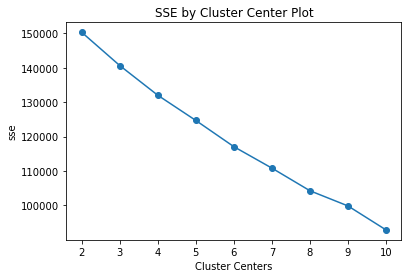

In [13]:
find_optimal_clusters(zscored_vec, 10)

In [14]:
# Let's use the TFIDF vectors

X_zscored = zscore(X.toarray())

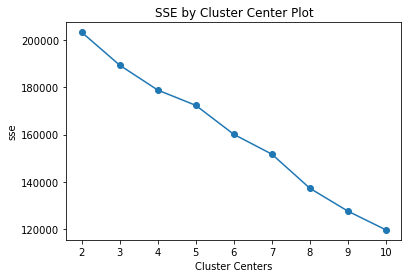

In [15]:
find_optimal_clusters(X_zscored, 10)

From the above both plots, it can be worked out if we set the number of clusters as 4. So, let's see how the clusters look like.

### Clustering Term Frequency vectors:

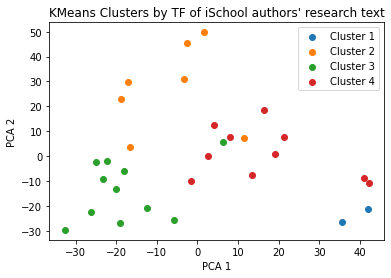

In [16]:
pca = PCA(2)
pca_vec = pca.fit_transform(zscored_vec)

km = KMeans(n_clusters=4,random_state=0, n_init=20)
km.fit(pca_vec)

#Getting unique labels
 

label = km.fit_predict(zscored_vec)
u_labels = np.unique(label)

#plotting the results:
 
for i in u_labels:
    plt.scatter(pca_vec[label == i , 0] , pca_vec[label == i , 1] , label = 'Cluster ' + str(i+1))
plt.legend()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title("KMeans Clusters by TF of iSchool authors' research text")
#plt.scatter(km.cluster_centers_)
plt.show()

In [17]:
for i in u_labels:
    print(f'Authors in Cluster {i+1} \n')
    print(df.Name[km.labels_ == i].tolist())
    print()

Authors in Cluster 1 

['Beth Patin', 'LaVerne Gray']

Authors in Cluster 2 

['Carsten Oesterlund', 'Daniel Acuna', 'Jeffrey M Stanton', 'Jeffrey Saltz', 'Jian Qin', 'Kevin G Crowston', 'Lu Xiao']

Authors in Cluster 3 

['Bei Yu', 'Bryan C Semaan', 'Caroline Haythornthwaite', 'Ingrid Erickson', 'Jeffrey Hemsley', 'Jennifer Stromer-Galley', 'Joshua Introne', 'Murali Venkatesh', 'Ping Zhang', 'Radhika Garg', 'Steven B Sawyer']

Authors in Cluster 4 

['Bruce Kingma', 'Carlos Enrique Caicedo Bastidas', 'Jason Dedrick', 'Joon S Park', 'Lee W McKnight', 'Marilyn Arnone', 'Martha A Garcia-Murillo', 'Megan Oakleaf', 'Michelle L Kaarst-Brown', 'Rachel Clarke']



### LDA Topic Modeling

#### Grid search to find optimum number of topics

In [53]:
parameters = {'n_components': [5, 6, 7, 8, 9, 10]}
lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
model = GridSearchCV(lda, parameters)
model.fit(X)

GridSearchCV(estimator=LatentDirichletAllocation(learning_method='online',
                                                 learning_offset=50.0,
                                                 max_iter=5, random_state=0),
             param_grid={'n_components': [5, 6, 7, 8, 9, 10]})

In [54]:
print(f'Best Estimator: {model.best_estimator_}\n')

print(f'Best parameters from the grid: {model.best_params_}\n')

print(f'Log likelihood of the model: {round(model.best_score_, 2)}\n')

print(f'Perplexity: {round(model.best_estimator_.perplexity(vectors), 2)}')

Best Estimator: LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=5, random_state=0)

Best parameters from the grid: {'n_components': 5}

Log likelihood of the model: -17692.16

Perplexity: 18206.65


In [55]:
# lda = LatentDirichletAllocation(n_components=2, max_iter=5, learning_method='online', learning_offset=50.,random_state=0)

# lda.fit_transform(vectors)

tf_feature_names = count_vec.get_feature_names()
best_lda = model.best_estimator_

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 20

display_topics(best_lda, tf_feature_names, no_top_words)

Topic 0:
cut wireless suggested management shadow willingly cumulative services marketer monkeys severe observational grid citizens lacking inverse transfers trauma everest decolonization
Topic 1:
data science social information research use work learning online design lis designing issues scientific introduction resembles programs media understanding predicament
Topic 2:
prolonged reconcile children complexity researching yield fuzzy regression mie calculate falsify supervised clusters michigan boards equitable paradoxical 155 ist computing
Topic 3:
url unrest iteration alarming dtw consequence lis partisan centralization perceived historian write civilians continuing exciting incorporation balancing carries concrete supplement
Topic 4:
papacharissi 834 geared filling oldenburg november corrupt era placed tangential body hegemonic drexel governed candidate mitigated reification nouns straight crime


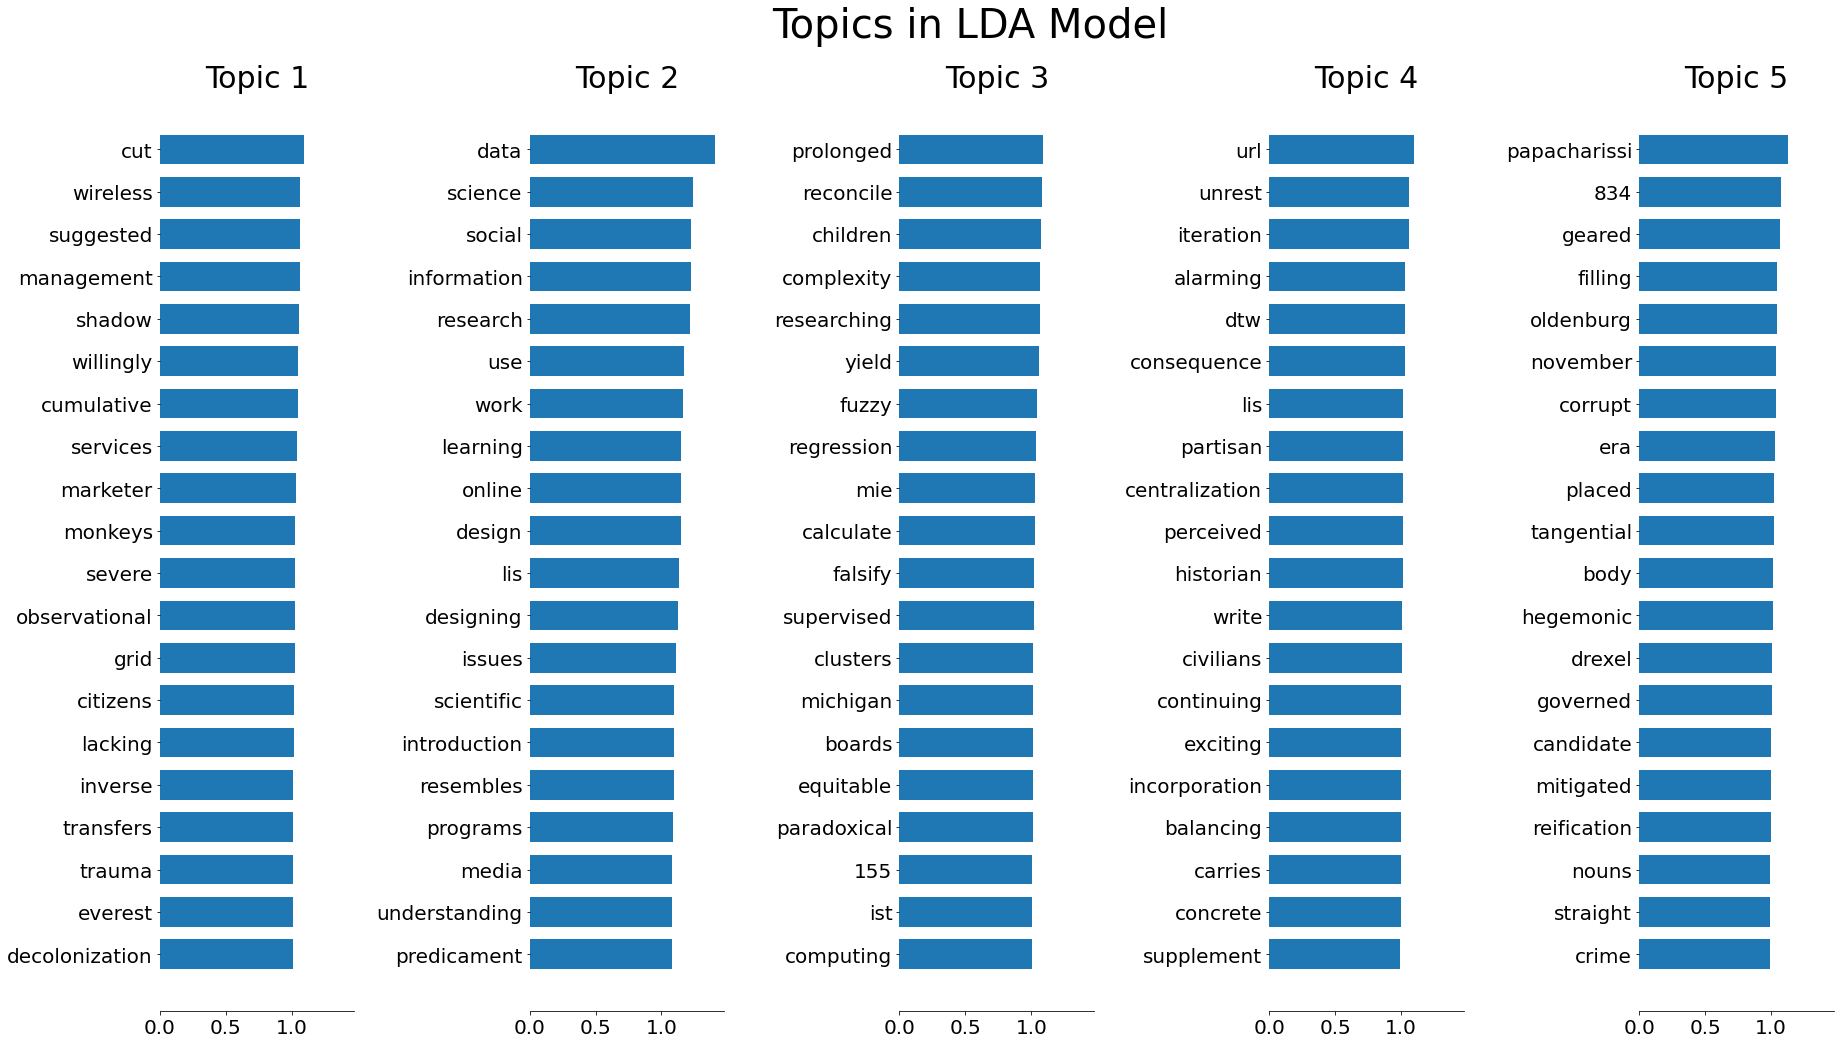

In [57]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
plot_top_words(best_lda, tf_feature_names, 20, 'Topics in LDA Model')